# Unsupervised learning: k-Means Clustering

Clustering is the process of partitioning a group of data points into a small number of clusters (groups). For instance, the following items in a supermarket: 
- carrots
- butter
- milk
- broccoli
- cheese
- lettuce

could be clustered in two groups: dairy products (butter, cheese and milk) and vegetable products (lettuce, broccoli and carrots): 

|Dairy | Vegetables  |
|------|-------------|
|Butter   |Lettuce   |
|Cheese   |Broccoli   |
|Milk   |Carrots   |

Another example, in the following image, a bunch of data points without labels **$y$** (shown in green), are clustered using the iterative k-means algorithm into 2 groups (red and blue)
![](./images/kmeansViz.png)

In this practical, we will carry out clustering (a type of unsupervised learning) using the K-means algorithm. Once again, in unsupervised learning tasks, we only have a feature matrix $X$, and we lack a vector of target/classes values $y$. To a certain extent, clustering is about finding a sensible target vector $y$ assuming there exists some structure in the data. 

We start this tutorial by generating some artificial 2 dimensional data. Since this data is artificially generated, $y$ will be available to us, which will be useful for display purposes of group memberships for individual data points and therefore test the performance of our clustering algorithm. Under normal circumstances however, in a clustering problem $y$ will usually not be available. 

The following code snippet creates a bunch of data points from 4 background clusters.

In [1]:
import matplotlib.pyplot as plt
plt.jet() # set the color map. 
import sklearn.datasets as datasets;

#the following line creates data points belonging to 4 bakcground clusters with 0.5 standard deviation within each cluster. Their random_state parameter is for reproducibility purposes
X, y = datasets.make_blobs(centers=4, cluster_std=0.5, random_state=0)

As always, we first plot the data to get a feeling of what we're dealing with:

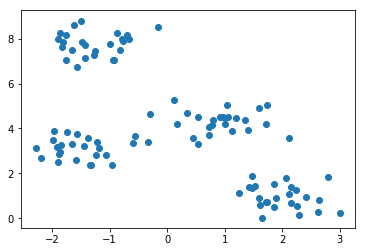

In [2]:
%matplotlib inline
#Remember you don't need the previous line in Spyder
import pylab as plt
plt.scatter(X[:,0], X[:,1]);
plt.show()

The data looks like it may contain 4 different "types" of data points. In fact, this is how it was created above by using the `centers` parameter in the `make_blobs` function equal to 4. We can plot the category information contained in vector $y$ as well, using the color parameter `c`. Once again, be aware that this plot is just for visualization purposes because in the artificial data set we are working with we know the right category/class/target of each point. In a real clustering unsupervised learning problem, you do not know the categories, $y$, of the data contained in $X$. In fact, you're trying to estimate the $y$ vector that makes sense to partition the data.

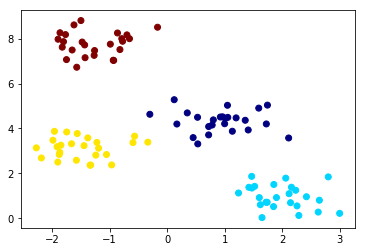

In [3]:
plt.scatter(X[:,0], X[:,1], c=y);

 Unsupervised clustering is all about trying to estimate $y$ from the data $X$ alone. This is what the k-Means algorithm does. The code necessary to run the k-Means algorithm in `scikit-learn` is extremely straightforward. You need to provide the parameter `n_clusters`, containing your guess for the number of clusters existing in the data to the `KMeans` class. The `random_state` paramenter specifies the generator used to initialize the centroids. If an integer is given, it fixes the seed so my results are reproducible in your computer.

In [4]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=8) #You guess there are 4 groups in the data
y_predicted = kmeans.fit(X).labels_ #y_predicted contains the estimated group belonging of each data point

Now the label assignments should be quite similar to $y$, up to a different ordering of the colors. remember that the k-means clustering algorithm does not have access to the $y$ vector, so it doesn't know that some groups were given the arbitrary color yellow, cyan, etc. You will notice however, that group membership is consistent with real data points class (high intra-group similarity, low inter-group similarity). That is, the k-means algorithm has found the hidden structure in the data, and is able to partition the data accordingly.

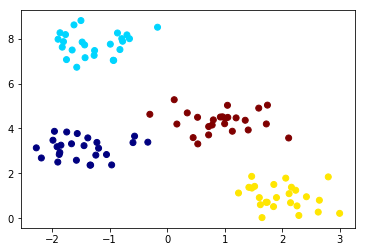

In [5]:
plt.scatter(X[:,0], X[:,1], c=y_predicted);

Sometimes, in a given problem you are interested in the assignment of each point to a centroid (group/cluster). Other times, you will be interested in the centroids themselves (the mean μ of each group/cluster). Hence, we will have a closer look at the means μ of each centroid  as calculated from KMeans. Keep in mind that, the means in μ can be seen as representatives of their respective cluster. In the next Figure, we plot the centroid of each group as a big square color-coded with the color of the group they represent.

Cluster number 0 coordinates: [-1.47935679  3.11716896]
Cluster number 1 coordinates: [-1.26811733  7.76378266]
Cluster number 2 coordinates: [1.99186903 0.96561071]
Cluster number 3 coordinates: [0.92578447 4.32475792]


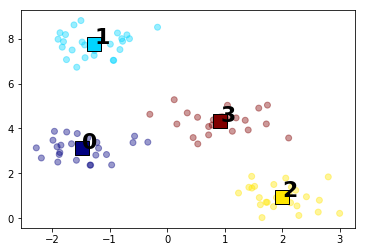

In [6]:
import numpy as np
plt.scatter(X[:,0], X[:,1], c=y_predicted, alpha=0.4)
mu = kmeans.cluster_centers_
plt.scatter(mu[:,0], mu[:,1], s=200, marker='s',edgecolors='black',c=np.unique(y_predicted))

for i,c in enumerate(mu):
    plt.text(c[0],c[1], i, fontsize=22, fontweight='bold') #We annotate the cluster numbers in the figure
    print("Cluster number " + str(i) + " coordinates: " +str(mu[i]))


Let's say now you are handed in a new data point:

Text(-2.3, 0.6000000000000001, 'd1')

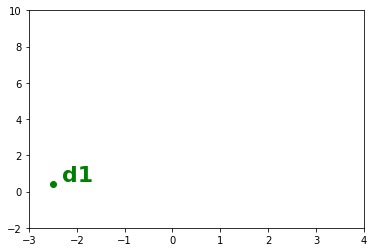

In [7]:
import numpy as np
d1 = np.array([-2.5,0.4])
plt.scatter(d1[0], d1[1], c="green")
plt.axis([-3, 4, -2, 10])
plt.text(d1[0]+0.2,d1[1]+0.2, "d1", fontsize=22, fontweight='bold',color='green') #We annotate the cluster numbers in the figure

to which cluster would your model assign this point?

In [8]:
kmeans.predict(d1.reshape(1,-1))

array([0])

notice that your K means estimated model, assigns the new green point to the 1st element of the array `mu`, which is the centroid (centroid 0) represented in purple in the previous to last figure. Make sure you understand that this assignment makes sense.  

In [38]:
print(mu[0])

[-1.47935679  3.11716896]


The assignment of the point `d1` to any other centroid wouldn't make any sense because the distance from `d1` to any other centroid is larger than the distance from `d1` to `mu[0]`. Again, make sure you understand this point and if that is not the case, talk to me.

## Exercises

Carry out the following tweaking of parameters in the previous walk-through and observe the impact on the analysis:

1. Increase the standard deviation of the clusters generated by the `make_blobs` function (`cluster_std`) and plot the results
2. Choose a "wrong" number of clusters (`n_clusters`) when creating a `KMeans` object
3. Change the number of clusters generated (centers parameter in the `make_blobs` function)